## Problem Statement
 

Let's take a case where an advertiser on the platform (DeltaX) would like to estimate the performance of their campaign in the future.

Imagine it is the first day of March and you are given the past performance data of ads between 1st August to 28th Feb. You are now tasked to predict an ad's future performance (revenue) between March 1st and March 15th. Well, it is now time for you to put on your problem-solving hats and start playing with the data provided under the "data" section.

 

Who is an advertiser?

 

An advertiser is a person or company that pays for their product/event to be advertised online or offline. 

## Importing Libraries  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [2]:
df= pd.read_csv("Train_Data.csv")
df

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71
...,...,...,...,...,...,...,...,...,...
4566,28-02-2021,campaign 1,adgroup 3,ad 55,19,6,0.07,0,0.00
4567,28-02-2021,campaign 1,adgroup 4,ad 55,1,0,0.00,0,0.00
4568,28-02-2021,campaign 1,adgroup 3,ad 56,16,8,0.12,1,93.20
4569,28-02-2021,campaign 1,adgroup 1,ad 56,37,13,0.23,0,0.00


In [3]:
df_1 = pd.read_csv("Test_Data.csv")
df_1

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0
...,...,...,...,...,...,...,...,...
313,15-03-2021,campaign 1,adgroup 4,ad 55,0.01,1,1,0
314,15-03-2021,campaign 1,adgroup 3,ad 55,0.01,5,1,0
315,15-03-2021,campaign 1,adgroup 1,ad 55,0.14,25,11,0
316,15-03-2021,campaign 1,adgroup 3,ad 56,0.06,9,4,0


In [4]:
df.isnull()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4566,False,False,False,False,False,False,False,False,False
4567,False,False,False,False,False,False,False,False,False
4568,False,False,False,False,False,False,False,False,False
4569,False,False,False,False,False,False,False,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 321.5+ KB


In [6]:
columns = df.columns

In [7]:
x_train = df[["impressions","clicks","cost","conversions"]]
y_train = df[["revenue"]]
x_test = df_1[["impressions","clicks","cost","conversions"]]

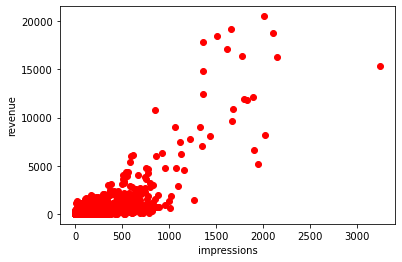

In [8]:
plt.scatter(df["impressions"],y_train,c="red")
plt.xlabel("impressions")
plt.ylabel("revenue")
plt.show()

Let's import LinearRegression from the module linear_model.

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
model.fit(x_train,y_train)

LinearRegression()

In [11]:
model.score(x_train,y_train)

0.9395557354753832

In [12]:
yhat_train = model.predict(x_train)
yhat_train[yhat_train<0] = 0.0
yhat_train

array([[  0.        ],
       [  0.        ],
       [  0.        ],
       ...,
       [200.02436727],
       [  0.        ],
       [  0.        ]])

# Visualizing Data

In [13]:
 model.coef_

array([[ -1.47774168,   2.69475817,  -9.29655304, 220.51769851]])

C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


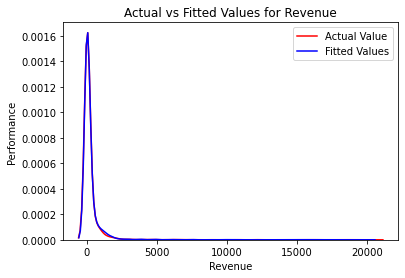

In [14]:
ax1 = sns.distplot(df["revenue"],hist = False , color="r", label="Actual Value")
sns.distplot(yhat_train, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Revenue')
plt.xlabel('Revenue')
plt.ylabel('Performance')
plt.legend()

plt.show()

In [15]:
yhat_test = model.predict(x_test)
yhat_test[yhat_test<0] = 0.0
yhat_test

df_output = pd.DataFrame(yhat_test , columns = ["revenue"])
df_output



,revenue
0,151.070161
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
313,0.000000
314,0.000000
315,0.000000
316,0.000000


In [17]:
df_output.to_csv("Predicted_Results1.csv" , index=False)

## Polynomial Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [19]:
x_train = df[["impressions","clicks","cost","conversions"]]
y_train = df[["revenue"]]
x_test = df_1[["impressions","clicks","cost","conversions"]]

In [20]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree =7,include_bias=False)), ('model',LinearRegression())]

In [21]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial',
                 PolynomialFeatures(degree=7, include_bias=False)),
                ('model', LinearRegression())])

Training the model using train data

In [22]:
p=pipe.fit(x_train,y_train)
p.score(x_train,y_train)

0.9900238518353133

In [23]:
yhat_train = pipe.predict(x_train)
yhat_train[yhat_train<0] = 0.0
yhat_train
p.score(x_train,yhat_train)

0.999945075373086

In [24]:
yhat_test = pipe.predict(x_test)
yhat_test[yhat_test<0] = 0.0
yhat_test

array([[1.32281702e+02],
       [3.86262601e-01],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.98318652e+02],
       [2.17641098e+00],
       [1.68225045e+02],
       [1.42960302e-01],
       [4.36110561e+02],
       [4.86839373e+00],
       [0.00000000e+00],
       [2.98471002e+02],
       [0.00000000e+00],
       [1.00412561e+02],
       [0.00000000e+00],
       [1.57662064e+02],
       [2.61351420e+00],
       [1.67304874e+02],
       [1.36792521e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [3.81349607e+02],
       [5.05938017e-04],
       [0.00000000e+00],
       [5.62314402e+02],
       [1.93424764e+02],
       [0.00000000e+00],
       [4.69743698e-01],
       [4.27132076e+02],
       [0.00000000e+00],
       [8.51868724e+02],
       [2.72811937e+02],
       [1.54253808e+02],
       [0.00000000e+00],
       [1.57068499e+02],
       [0.00000000e+00],
       [4.69743698e-01],
       [6.14460278e-01],


In [25]:
p.score(x_test,yhat_test)

0.9827538053492688

C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


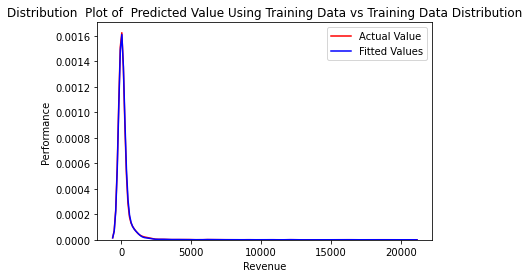

In [26]:
ax1 = sns.distplot(y_train,hist = False , color="r", label="Actual Value")
sns.distplot(yhat_train, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution')
plt.xlabel('Revenue')
plt.ylabel('Performance')
plt.legend()

plt.show()

In [27]:
df_output1 = pd.DataFrame(yhat_test, columns = ["revenue"])
df_output1

,revenue
0,132.281702
1,0.386263
2,0.000000
3,0.000000
4,0.000000
...,...
313,0.000000
314,0.078477
315,0.000000
316,0.000000


In [28]:
df_output1.to_csv("Predicted_Results4.csv" , index=False)